In [3]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
import schemdraw
import schemdraw.elements as elm
import matplotlib.pyplot as plt
import numpy as np
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

V1: 0.0 V2: 0.0 V3: 0.0 Vout: 0.0
V1: 0.0006283185203825331 V2: 0.0015707963009563327 V3: 0.0025132740815301323 Vout: 0.0015707963009563325
V1: 0.0012566369787525144 V2: 0.003141592446881286 V3: 0.0050265479150100574 Vout: 0.0031415924468812854
V1: 0.002513273461404651 V2: 0.006283183653511627 V3: 0.010053093845618604 Vout: 0.006283183653511626
V1: 0.005026542954007453 V2: 0.012566357385018632 V3: 0.020106171816029812 Vout: 0.012566357385018632
V1: 0.010053054157637725 V2: 0.025132635394094313 V3: 0.0402122166305509 Vout: 0.02513263539409431
V1: 0.020105854313461305 V2: 0.05026463578365326 V3: 0.08042341725384522 Vout: 0.050264635783653255
V1: 0.040209676650915155 V2: 0.10052419162728789 V3: 0.16083870660366062 Vout: 0.10052419162728789
V1: 0.0804030987259064 V2: 0.201007746814766 V3: 0.3216123949036256 Vout: 0.201007746814766
V1: 0.14313415732283533 V2: 0.3578353933070883 V3: 0.5725366292913413 Vout: 0.35783539330708836
V1: 0.2057239597872829 V2: 0.5143098994682073 V3: 0.8228958391491

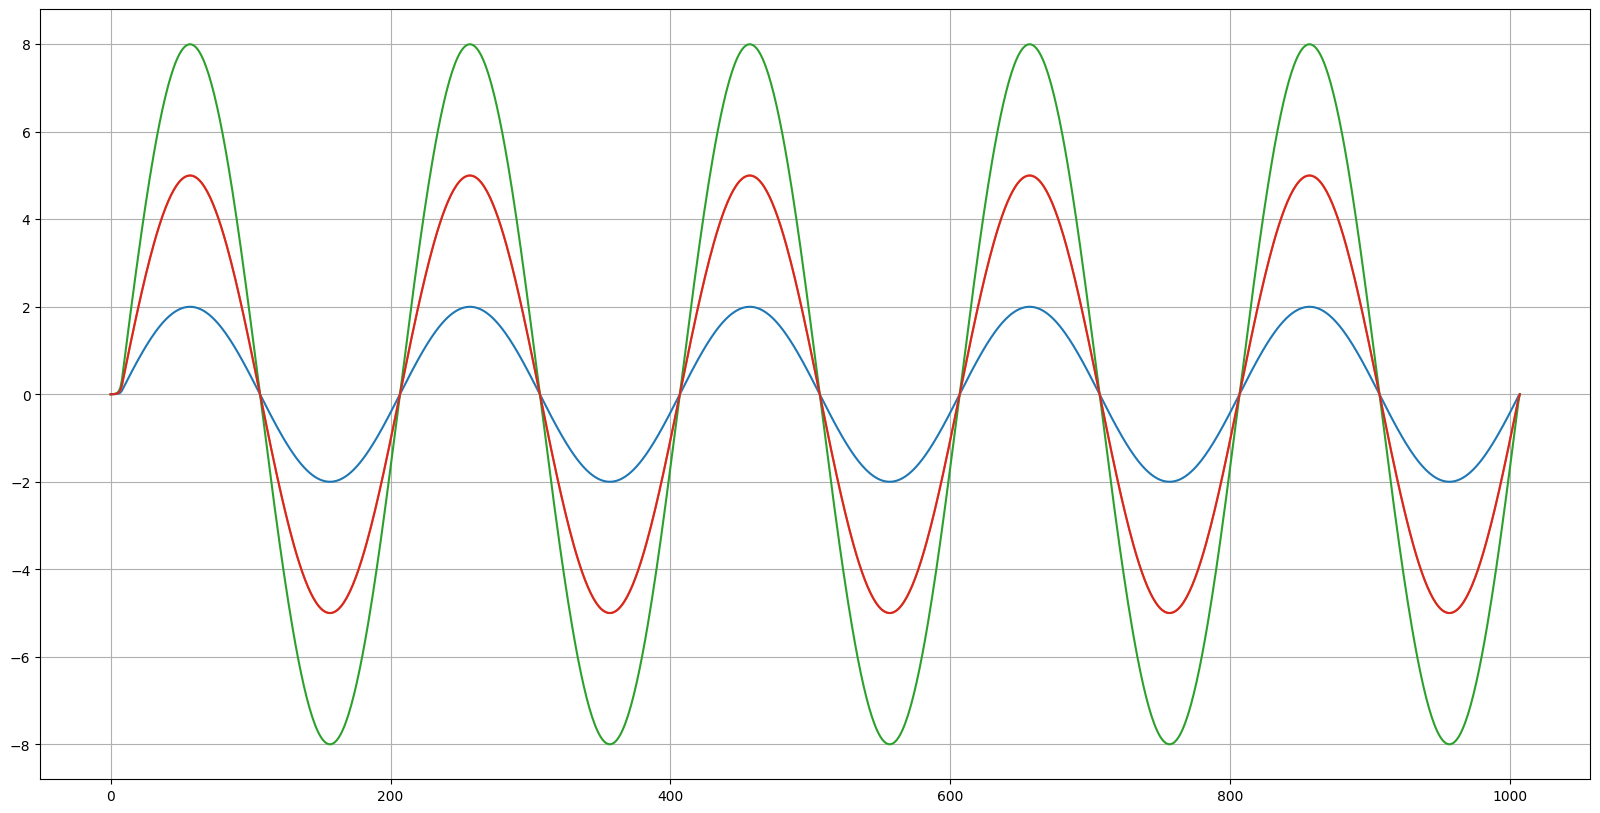

In [4]:
circuit = Circuit("Resistive Adder")

V1 = circuit.SinusoidalVoltageSource(1, 1, circuit.gnd,amplitude=2@u_V, frequency=50@u_Hz)
V2 = circuit.SinusoidalVoltageSource(2, 2, circuit.gnd,amplitude=5@u_V, frequency=50@u_Hz)
V3 = circuit.SinusoidalVoltageSource(3, 3, circuit.gnd,amplitude=8@u_V, frequency=50@u_Hz)

R1 = circuit.R(1, 1, "out", 1@u_kOhm)
R2 = circuit.R(2, 2, "out", 1@u_kOhm)
R3 = circuit.R(3, 3, "out", 1@u_kOhm)



simulator = circuit.simulator(temperature = 25)
analysis = simulator.transient(step_time = 100@u_us, end_time= 100@u_ms)



#for node in analysis.nodes.values():

 #   print('Node {}: {:4.3f} V'.format(str(node), float(node)))



#for node in analysis.branches.values():

 #   print('Branch {}: {:4.6f} A'.format(str(node), float(node)))




figure, ax = plt.subplots(figsize = (20, 10))
ax.grid()

numberOfSteps = len(analysis["1"])


for i in range(numberOfSteps):

    v1 = np.array(analysis["1"])[i]
    v2 = np.array(analysis["2"])[i]
    v3 = np.array(analysis["3"])[i]
    vout = np.array(analysis["out"])[i]
    print("V1:",v1,"V2:", v2,"V3:",v3,"Vout:",vout)






ax.plot(analysis["1"], label = "V1")
ax.plot(analysis["2"], label = "V2")
ax.plot(analysis["3"], label = "V3")
ax.plot(analysis["out"], label = "Vout")